In [78]:
from IPython.core.display import display, HTML

from leenwoordenzoekertei import LoanWordStats

import matplotlib.pyplot as plt

def show(x):
    display(HTML(x.reportHTML()))

    
    
def pie_with_labels(x):
   rest = x.number_of_words - x.number_of_loanwords
   #labels = ['Nederlands']
   #sizes = [rest]
   labels = []
   sizes = []
   for  language in x.language_stats:
      (language_hits, hits_unique)  = x.language_stats[language]
      labels.append(language)
      sizes.append(language_hits)
   
   plt.pie(sizes,  labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
   plt.axis('equal')
   plt.show()

def pie(x):
    labels = []
    sizes = []
    for  language in x.language_stats:
      (language_hits, hits_unique)  = x.language_stats[language]
      labels.append(language)
      sizes.append(language_hits)
    
    patches, texts = plt.pie(sizes, startangle=90, radius=1.2)
    legend_labels = labels = ['{0} - {1}'.format(i,j) for i,j in zip(labels, sizes)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, legend_labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, legend_labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
    plt.show()
    # plt.savefig('piechart.png', bbox_inches='tight')
     
    
lwFinder = LoanWordStats('leenwoord_data.tsv')

def do(x):
    lwFinder.find(x)
    pie(lwFinder)
    show(lwFinder)
    
from IPython.display import display
from ipyupload import FileUpload

uploader = ""
def uploadFile():
    global uploader
    uploader = FileUpload(
        # https://developer.mozilla.org/en-US/docs/Web/HTML/Element/input#attr-accept
        # eg. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
        accept='', # default
        # True to accept multiple files upload else False
        multiple=False, # default
        # True to disable the button else False to enable it
        disabled=False, # default
        # CSS transparently passed to button (a button element overlays the input[type=file] element for better styling)
        # e.g. 'color: darkblue; background-color: lightsalmon; width: 180px;'
        style_button='' # default
        # to compress data from browser to kernel
        # compress level from 1 to 9 incl. - 0 for no compression
        )
    display(uploader)

def processUpload():
    global uploader
    contents = uploader.value[list(uploader.value.keys())[0]]['content'].decode("utf-8") 
    lwFinder.findFromString(contents)
    pie(lwFinder)
    show(lwFinder)

In [79]:
uploadFile()

FileUpload()

In [80]:
list(uploader.value.keys())

['Leenwoordenzoeker_(Leenwrdb-CW-EWB)_laatste_versie.tsv']

In [ ]:
processUpload()

In [35]:
lwFinder.find('zouden er a priori leenwoorden actief zijn? meneer de doerak? Interessante parvenu.')

In [36]:
show(lwFinder)

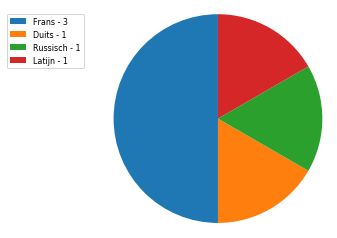

In [38]:
pie(lwFinder)

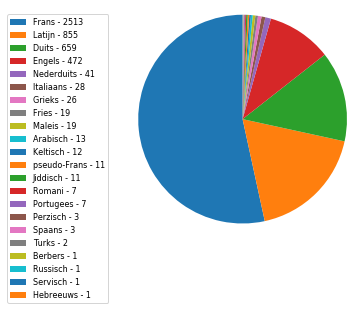

In [41]:
do('/mnt/Scratch/jesse/NRCVk2002_alles.txt')